In [194]:
!pip install --upgrade git+https://github.com/sovrasov/flops-counter.pytorch.git

  Cloning https://github.com/sovrasov/flops-counter.pytorch.git to /private/var/folders/79/dfchmlb91h7c1z8tphnwp1lc0000gn/T/pip-req-build-7p78vh1q
  Running command git clone -q https://github.com/sovrasov/flops-counter.pytorch.git /private/var/folders/79/dfchmlb91h7c1z8tphnwp1lc0000gn/T/pip-req-build-7p78vh1q
  Resolved https://github.com/sovrasov/flops-counter.pytorch.git to commit deaefe75eaf6f83ca713edee30e82c5da33f6863
  Created wheel for ptflops: filename=ptflops-0.6.6-py3-none-any.whl size=9721 sha256=3544062ea245e208783454235e566718fdb36896e4e6670da2d8918a48270cd9
  Stored in directory: /private/var/folders/79/dfchmlb91h7c1z8tphnwp1lc0000gn/T/pip-ephem-wheel-cache-6y49bt0e/wheels/f6/86/62/27e886404ba96a65727a9627aa9b0c8089243706ae160bc0c9
Successfully built ptflops


In [220]:
# structured pruning
import torch
import torchvision
import torch.nn as nn
import copy
from ptflops import get_model_complexity_info
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.functional as F

In [204]:
vgg = torchvision.models.vgg16(pretrained=True)
vgg_clone = copy.deepcopy(vgg)

In [205]:
macs, params = get_model_complexity_info(vgg, (3, 224, 224), as_strings=True,
                                         print_per_layer_stat=True)

VGG(
  138.358 M, 100.000% Params, 15.504 GMac, 100.000% MACs, 
  (features): Sequential(
    14.715 M, 10.635% Params, 15.38 GMac, 99.202% MACs, 
    (0): Conv2d(0.002 M, 0.001% Params, 0.09 GMac, 0.580% MACs, 3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(0.0 M, 0.000% Params, 0.003 GMac, 0.021% MACs, inplace=True)
    (2): Conv2d(0.037 M, 0.027% Params, 1.853 GMac, 11.951% MACs, 64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(0.0 M, 0.000% Params, 0.003 GMac, 0.021% MACs, inplace=True)
    (4): MaxPool2d(0.0 M, 0.000% Params, 0.003 GMac, 0.021% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(0.074 M, 0.053% Params, 0.926 GMac, 5.976% MACs, 64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(0.0 M, 0.000% Params, 0.002 GMac, 0.010% MACs, inplace=True)
    (7): Conv2d(0.148 M, 0.107% Params, 1.851 GMac, 11.941% MACs, 128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

In [206]:
macs

'15.5 GMac'

In [207]:
params

'138.36 M'

In [148]:
a = torch.randn((4, 3, 3, 3))
a[:,[0,1],:,:].shape
(a / torch.max(a)).tolist()

[[[[-0.16350622475147247, -0.07401609420776367, -0.056053344160318375],
   [0.2588668167591095, -0.3263116478919983, -0.029506804421544075],
   [-0.1876847892999649, -0.1301329880952835, -0.38299739360809326]],
  [[0.03429652377963066, 0.051587656140327454, -0.12162038683891296],
   [0.1635763943195343, -0.3160349130630493, -0.30577000975608826],
   [-0.0678848922252655, -0.393067866563797, 0.33400794863700867]],
  [[0.2784968614578247, -0.09737075120210648, 0.07903378456830978],
   [-0.2351754605770111, 0.47510629892349243, 0.18458431959152222],
   [-0.38135212659835815, -0.013502813875675201, -0.0532434917986393]]],
 [[[-0.28504395484924316, -0.51447993516922, -0.28853124380111694],
   [0.27803173661231995, 0.4745214283466339, -0.16598549485206604],
   [0.22634132206439972, 0.3654625415802002, -0.03362951800227165]],
  [[0.057958390563726425, 0.3123165965080261, 0.11660321056842804],
   [-0.10809456557035446, 0.1941748857498169, 0.13881708681583405],
   [0.006201550830155611, 0.21770

In [110]:
list(vgg.modules())

[VGG(
   (features): Sequential(
     (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU(inplace=True)
     (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU(inplace=True)
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (6): ReLU(inplace=True)
     (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (8): ReLU(inplace=True)
     (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
     (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (11): ReLU(inplace=True)
     (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (13): ReLU(inplace=True)
     (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (15): ReLU(inplace=True)
     (16): MaxPool2d(kernel_size=2, stride=2, pa

In [184]:
m = nn.AdaptiveAvgPool2d((5,7))
input = torch.randn(1, 64, 8, 9)
output = m(input)
output.shape

torch.Size([1, 64, 5, 7])

In [149]:
for module in vgg.modules():
    if isinstance(module, torchvision.models.vgg.VGG):
        continue
    if not isinstance(module, nn.Sequential):
        print(type(module))

<class 'torch.nn.modules.conv.Conv2d'>
<class 'torch.nn.modules.activation.ReLU'>
<class 'torch.nn.modules.conv.Conv2d'>
<class 'torch.nn.modules.activation.ReLU'>
<class 'torch.nn.modules.pooling.MaxPool2d'>
<class 'torch.nn.modules.conv.Conv2d'>
<class 'torch.nn.modules.activation.ReLU'>
<class 'torch.nn.modules.conv.Conv2d'>
<class 'torch.nn.modules.activation.ReLU'>
<class 'torch.nn.modules.pooling.MaxPool2d'>
<class 'torch.nn.modules.conv.Conv2d'>
<class 'torch.nn.modules.activation.ReLU'>
<class 'torch.nn.modules.conv.Conv2d'>
<class 'torch.nn.modules.activation.ReLU'>
<class 'torch.nn.modules.conv.Conv2d'>
<class 'torch.nn.modules.activation.ReLU'>
<class 'torch.nn.modules.pooling.MaxPool2d'>
<class 'torch.nn.modules.conv.Conv2d'>
<class 'torch.nn.modules.activation.ReLU'>
<class 'torch.nn.modules.conv.Conv2d'>
<class 'torch.nn.modules.activation.ReLU'>
<class 'torch.nn.modules.conv.Conv2d'>
<class 'torch.nn.modules.activation.ReLU'>
<class 'torch.nn.modules.pooling.MaxPool2d'>


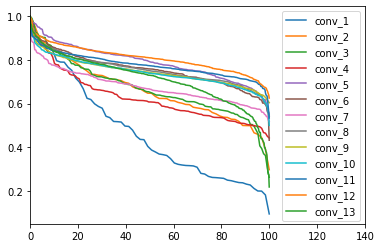

In [150]:
import matplotlib.pyplot as plt
import numpy as np
plt.xlim([0, 140])
conv_layers_nb = 0
conv_filters_nb = 0
for i in range(len(vgg.features)):
    module = vgg.features[i]
    if isinstance(module, nn.Conv2d):
        conv_layers_nb += 1
        conv_filters_nb += module.weight.shape[0]
        with torch.no_grad():
            x_axis = [i / module.weight.shape[0] * 100 for i in range(module.weight.shape[0])]
            ranks = torch.sum(torch.abs(module.weight), (1,2,3))
            y_axis = (torch.sort(ranks, descending=True)[0] / torch.max(ranks)).numpy().reshape(-1).tolist()
        plt.plot(np.linspace(0,100,len(y_axis)), y_axis)
plt.legend([f'conv_{i+1}' for i in range(conv_layers_nb)])
plt.show()

In [151]:
conv_filters_nb

4224

In [265]:
for module in vgg.modules():
    if isinstance(module, nn.Sequential):
        for i, module in module.named_children():
            print(module)

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True)
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace=True

In [159]:
import inspect
for i in range(len(vgg.classifier)):
    module = vgg.classifier[i]
#     print(module)
#     if hasattr(module, 'weight'):
#         print(type(module))
    if isinstance(module, nn.Linear):
        print(module.weight.shape)
#     if isinstance(module, nn.Conv2d):
#         ranks = torch.sum(torch.abs(module.weight), (1, 2, 3))
#         print(ranks);
#         indices = torch.topk(ranks,3).indices
#         selected = [i for i in range(module.weight.shape[0]) if i not in indices]
#         print(module.weight.data[selected].shape); 
#         print(module.bias.data[selected].shape); break

torch.Size([4096, 25088])
torch.Size([4096, 4096])
torch.Size([1000, 4096])


In [186]:
vgg.avgpool.output_size

(7, 7)

In [377]:
# greedy - consider weights pruned from previous layer while computing the ranks, independent - do not consider
CONV_LAYERS = 2
def prune(model, prune_layer_index, filters_to_prune: int):
    # default - greedy strategy
    def get_updated_conv(layer, weight_prune_index: torch.Tensor, layer_index: int) -> None:
        assert(indices is not None)
        selected = [i for i in range(layer.weight.shape[0]) if i not in weight_prune_index]
            # ignoring the other parameters for now like groups etc
        conv = nn.Conv2d(in_channels=layer.in_channels, 
                         out_channels=layer.out_channels-len(weight_prune_index),
                         kernel_size=layer.kernel_size, stride=layer.stride, dilation=layer.dilation,
                         padding=layer.padding)
        conv.weight.data = layer.weight.data[selected]
        conv.bias.data = layer.bias.data[selected]
        model.features[i] = conv
        
        for j in range(layer_index+1, len(model.features)):
            if hasattr(model.features[j], 'weight'):
                if isinstance(model.features[j], nn.Conv2d):
                    next_layer = model.features[j]
                    conv = nn.Conv2d(in_channels=next_layer.in_channels-len(weight_prune_index),
                                     out_channels=next_layer.out_channels,
                                     kernel_size=next_layer.kernel_size, stride=next_layer.stride, dilation=next_layer.dilation,
                                     padding=next_layer.padding)
                    conv.weight.data = next_layer.weight.data[:,selected,:,:]
                    conv.bias.data = next_layer.bias.data
                    model.features[j] = conv
                    break
                elif isinstance(model.features[j], nn.BatchNorm2d):
                    next_layer = model.features[j]
                    norm = nn.BatchNorm2d(num_features=next_layer.num_features-len(weight_prune_index),
                                          eps=next_layer.eps, momentum=next_layer.momentum, affine=next_layer.affine,
                                          track_running_stats=next_layer.track_running_stats)
                    norm.weight.data = next_layer.weight.data[selected]
                    norm.bias.data = next_layer.bias.data[selected]
                    if next_layer.track_running_stats:
                        norm.running_mean.data = next_layer.running_mean.data[selected]
                        norm.running_var.data = next_layer.running_var.data[selected]
                    model.features[j] = norm
                else:
                    raise Exception(f'Unsupported module type: {type(model.features[j])}')
        if prune_layer_index == CONV_LAYERS: # last conv layer
            for j in range(len(model.classifier)):
                if hasattr(model.classifier[j], 'weight'):
                    if isinstance(model.classifier[j], nn.Linear):
                        next_layer = model.classifier[j]
                        linear = nn.Linear(in_features=next_layer.in_features-len(weight_prune_index), \
                                           out_features=next_layer.out_features)
                        weights = next_layer.weight.data
                        weights = weights.view(next_layer.out_features, 
                                               layer.out_channels, -1)
                        linear.weight.data = weights[:,selected,:].view(next_layer.out_features,-1)
                        linear.bias.data = next_layer.bias.data
                        model.classifier[j] = linear
                        break
                else:
                    raise Exception(f'Unsupported module type: {type(model.classifier[j])}')
                   
    conv_layer_num = 0
    for i in range(len(model.features)):
        module = model.features[i]
        if isinstance(module, nn.Conv2d):
            conv_layer_num += 1
            if conv_layer_num == prune_layer_index:
                filter_scores = torch.sum(torch.abs(module.weight),(1,2,3))
                indices = torch.topk(filter_scores, filters_to_prune).indices
                get_updated_conv(module, indices, i)

In [410]:
macs, params = get_model_complexity_info(net_clone, (3, 32, 32), as_strings=True,
                                         print_per_layer_stat=True)

Net(
  0.051 M, 100.000% Params, 0.0 GMac, 100.000% MACs, 
  (features): Sequential(
    0.001 M, 2.429% Params, 0.0 GMac, 85.303% MACs, 
    (0): Conv2d(0.0 M, 0.444% Params, 0.0 GMac, 52.191% MACs, 3, 3, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(0.0 M, 0.000% Params, 0.0 GMac, 0.687% MACs, )
    (2): BatchNorm2d(0.0 M, 0.012% Params, 0.0 GMac, 1.373% MACs, 3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(0.0 M, 0.000% Params, 0.0 GMac, 0.687% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(0.001 M, 1.923% Params, 0.0 GMac, 28.847% MACs, 3, 13, kernel_size=(5, 5), stride=(1, 1))
    (5): ReLU(0.0 M, 0.000% Params, 0.0 GMac, 0.380% MACs, )
    (6): BatchNorm2d(0.0 M, 0.051% Params, 0.0 GMac, 0.759% MACs, 13, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(0.0 M, 0.000% Params, 0.0 GMac, 0.380% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  

In [211]:
macs

'15.5 GMac'

In [158]:
for i in range(len(vgg_clone.features)):
    module = vgg_clone.features[i]
    if isinstance(module, nn.Conv2d):
        print(module.weight.shape)
for i in range(len(vgg_clone.classifier)):
    module = vgg_clone.classifier[i]
    if isinstance(module, nn.Linear):
        print(module.weight.shape)

torch.Size([64, 3, 3, 3])
torch.Size([64, 64, 3, 3])
torch.Size([128, 64, 3, 3])
torch.Size([128, 128, 3, 3])
torch.Size([256, 128, 3, 3])
torch.Size([256, 256, 3, 3])
torch.Size([256, 256, 3, 3])
torch.Size([512, 256, 3, 3])
torch.Size([512, 512, 3, 3])
torch.Size([512, 512, 3, 3])
torch.Size([512, 512, 3, 3])
torch.Size([512, 512, 3, 3])
torch.Size([509, 512, 3, 3])
torch.Size([4096, 25088])
torch.Size([4096, 4096])
torch.Size([1000, 4096])


In [344]:
# Training a neural network architechture from scratch for CIFAR10
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 8

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


tensor(-0.9843) tensor(1.)


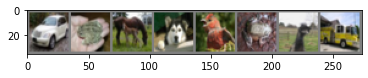

  car  frog horse   dog  bird  frog  bird truck


In [345]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
# (x - mu) / sigma -> y -> y * 0.5 + 0.5

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images[0].min(), images[0].max())

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [346]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(*[
            nn.Conv2d(3, 6, 5), nn.ReLU(), nn.BatchNorm2d(6), nn.MaxPool2d(2, 2),
            nn.Conv2d(6, 16, 5), nn.ReLU(), nn.BatchNorm2d(16), nn.MaxPool2d(2, 2)
        ])
        self.classifier = nn.Sequential(*[
            nn.Linear(16 * 5 * 5, 120), nn.ReLU(),
            nn.Linear(120, 84), nn.ReLU(),
            nn.Linear(84, 10)
        ])

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1) 
        x = self.classifier(x)
        return x

In [396]:
net_clone = copy.deepcopy(net)

In [398]:
prune(net_clone, 2, 3)
prune(net_clone, 1, 3)

In [399]:
for i in range(len(net_clone.classifier)):
    module = net_clone.classifier[i]
    if isinstance(module, nn.Linear):
        print(module.weight.shape)

torch.Size([120, 325])
torch.Size([84, 120])
torch.Size([10, 84])


In [349]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(trainloader), epochs=2)

In [352]:
%%time
EPOCHS = 10
for epoch in range(EPOCHS):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
    scheduler.step()

[1,  2000] loss: 1.057
[1,  4000] loss: 1.066
[1,  6000] loss: 1.067
[2,  2000] loss: 0.982
[2,  4000] loss: 1.002
[2,  6000] loss: 0.990
[3,  2000] loss: 0.932
[3,  4000] loss: 0.942
[3,  6000] loss: 0.938
[4,  2000] loss: 0.872
[4,  4000] loss: 0.884
[4,  6000] loss: 0.893
[5,  2000] loss: 0.816
[5,  4000] loss: 0.854
[5,  6000] loss: 0.862
[6,  2000] loss: 0.794
[6,  4000] loss: 0.810
[6,  6000] loss: 0.815
[7,  2000] loss: 0.742
[7,  4000] loss: 0.786
[7,  6000] loss: 0.791
[8,  2000] loss: 0.719
[8,  4000] loss: 0.745
[8,  6000] loss: 0.767
[9,  2000] loss: 0.689
[9,  4000] loss: 0.720
[9,  6000] loss: 0.740
[10,  2000] loss: 0.672
[10,  4000] loss: 0.691
[10,  6000] loss: 0.713
CPU times: user 7min 58s, sys: 1min 13s, total: 9min 11s
Wall time: 10min 3s


In [400]:
%%time
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 64 %
CPU times: user 2.7 s, sys: 483 ms, total: 3.18 s
Wall time: 13.7 s


In [403]:
%%time
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net_clone(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 59 %
CPU times: user 2.96 s, sys: 591 ms, total: 3.55 s
Wall time: 14.5 s


In [402]:
# retraining the pruned network
EPOCHS = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_clone.parameters(), lr=0.001, momentum=0.9)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(trainloader), epochs=EPOCHS)
for epoch in range(EPOCHS):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net_clone(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
    scheduler.step()

[1,  2000] loss: 1.411
[1,  4000] loss: 1.263
[1,  6000] loss: 1.193
[2,  2000] loss: 1.107
[2,  4000] loss: 1.106
[2,  6000] loss: 1.097
[3,  2000] loss: 1.019
[3,  4000] loss: 1.031
[3,  6000] loss: 1.033
[4,  2000] loss: 0.973
[4,  4000] loss: 0.967
[4,  6000] loss: 0.982
[5,  2000] loss: 0.912
[5,  4000] loss: 0.928
[5,  6000] loss: 0.957
[6,  2000] loss: 0.878
[6,  4000] loss: 0.929
[6,  6000] loss: 0.914
[7,  2000] loss: 0.845
[7,  4000] loss: 0.870
[7,  6000] loss: 0.903
[8,  2000] loss: 0.816
[8,  4000] loss: 0.852
[8,  6000] loss: 0.871
[9,  2000] loss: 0.798
[9,  4000] loss: 0.829
[9,  6000] loss: 0.847
[10,  2000] loss: 0.770
[10,  4000] loss: 0.800
[10,  6000] loss: 0.828


In [404]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [405]:
PATH = './cifar_net_clone.pth'
torch.save(net_clone.state_dict(), PATH)

In [407]:
!ls -lh

total 11024
-rw-r--r--  1 ksangeet  staff   136K Oct  4 00:51 PRUNING FILTERS FOR EFFICIENT CONVNETS.ipynb
-rw-r--r--  1 ksangeet  staff   248K Oct  4 00:52 cifar_net.pth
-rw-r--r--  1 ksangeet  staff   206K Oct  4 00:52 cifar_net_clone.pth
drwxr-xr-x  4 ksangeet  staff   128B Oct  2 04:16 data
-rw-r--r--@ 1 ksangeet  staff   4.8M Sep 25 21:32 model.onnx
-rwxr-xr-x  1 ksangeet  staff   5.4K Sep 27 10:38 pruning.py
-rw-r--r--@ 1 ksangeet  staff   4.4K Sep 26 22:53 vpg.py
